# SmartBeds - Preprocesado de Datos

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt

In [2]:
import pickle as pk

### Lectura

In [3]:
import loadData as ld

datos = ld.load(r"../data/")
datos = ld.preprocess(datos)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
200,2018-10-30 21:23:01,1.0,20.0,26.0,22.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
201,2018-10-30 21:23:02,2.0,20.0,26.0,22.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
202,2018-10-30 21:23:03,2.0,20.0,26.0,22.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
203,2018-10-30 21:23:04,2.0,20.0,26.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
204,2018-10-30 21:23:05,1.0,20.0,26.0,21.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False


### Datos manuales

In [4]:
datos = ld.newSeizure(datos,'2018-11-10 3:30:00',60*20)

### Preprocesado

In [5]:
# Ordención
datos = datos.sort_values(by='DateTime')

In [6]:
# Eliminación de negativos y filtrado
for d in datos:
    if datos[d].dtype == np.float64:
        datos.loc[datos[d]<5.0,d]=0.0
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
200,2018-10-30 21:23:01,0.0,20.0,26.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
201,2018-10-30 21:23:02,0.0,20.0,26.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
202,2018-10-30 21:23:03,0.0,20.0,26.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
203,2018-10-30 21:23:04,0.0,20.0,26.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
204,2018-10-30 21:23:05,0.0,20.0,26.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [7]:
# Normalización
tubesNorm = ld.normalize(datos.iloc[:,1:13])
datos=pd.concat([datos['DateTime'],tubesNorm*100,datos['target']],axis=1)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
200,2018-10-30 21:23:01,0.0,20.618557,26.804124,22.680412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
201,2018-10-30 21:23:02,0.0,20.618557,26.804124,22.680412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
202,2018-10-30 21:23:03,0.0,20.618557,26.804124,22.680412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
203,2018-10-30 21:23:04,0.0,20.618557,26.804124,21.649485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
204,2018-10-30 21:23:05,0.0,20.618557,26.804124,21.649485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [9]:
with open('data/datos_raw.pdd','wb') as f:
    pk.dump(datos,f)

In [10]:
# Suavizado
from scipy import signal

dt = datos.iloc[:,1:13]
dtN = dt.copy()
b, a = signal.butter(3, 0.05)
for i in range(len(dt.columns)):
    xn = dt.iloc[:,i]
    y = signal.filtfilt(b, a, xn)
    dtN["P"+str(i+1)]=y
dtN.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
200,1.828043e-322,20.611211,26.797396,22.687451,-2.276321e-23,-2.633068e-24,2.124482e-322,0.0,-1.729230e-322,1.482197e-322,-2.865581e-322,-2.223295e-322
201,1.926856e-322,20.629650,26.807212,22.631583,-2.459767e-23,-2.817358e-24,2.025669e-322,0.0,-1.828043e-322,1.383384e-322,-2.865581e-322,-2.173889e-322
202,2.025669e-322,20.648674,26.816089,22.578091,-2.608638e-23,-2.957664e-24,1.828043e-322,0.0,-1.926856e-322,1.185758e-322,-2.865581e-322,-2.124482e-322
203,2.075076e-322,20.668029,26.823743,22.527356,-2.713090e-23,-3.042774e-24,1.581010e-322,0.0,-2.025669e-322,8.893182e-323,-2.865581e-322,-2.124482e-322
204,2.124482e-322,20.687465,26.829917,22.479703,-2.762795e-23,-3.061047e-24,1.284571e-322,0.0,-2.075076e-322,5.434722e-323,-2.865581e-322,-2.173889e-322


In [11]:
## Eliminación de tubos con poca varianza
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
presiones_array = sel.fit_transform(dtN)
presiones_array[presiones_array<1e-4]=0

In [12]:
for i in range(1,len(presiones_array[0])+1):
    datos['P'+str(i)]=presiones_array[:,i-1]
listNames = ['DateTime']
for i in range(1,len(presiones_array[0])+1):
    listNames.append("P"+str(i))
listNames.append('target')
datos = datos[listNames]
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
200,2018-10-30 21:23:01,0.0,20.611211,26.797396,22.687451,0.0,0.0,False
201,2018-10-30 21:23:02,0.0,20.629650,26.807212,22.631583,0.0,0.0,False
202,2018-10-30 21:23:03,0.0,20.648674,26.816089,22.578091,0.0,0.0,False
203,2018-10-30 21:23:04,0.0,20.668029,26.823743,22.527356,0.0,0.0,False
204,2018-10-30 21:23:05,0.0,20.687465,26.829917,22.479703,0.0,0.0,False


C:\Users\jlgar\Miniconda3\envs\TFG\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


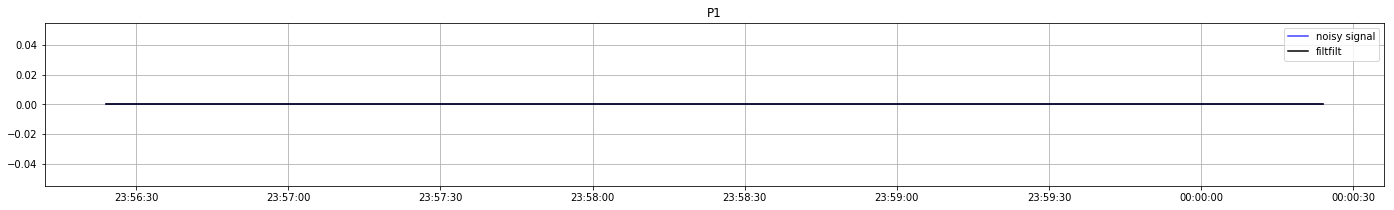

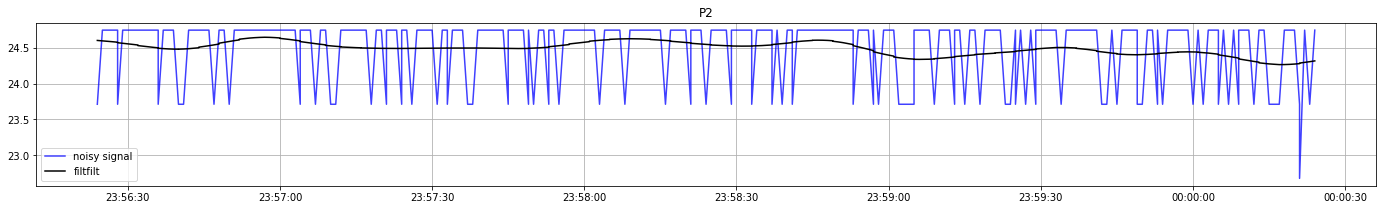

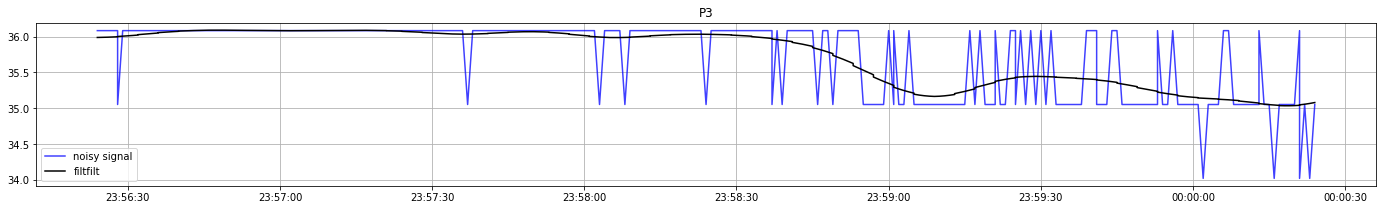

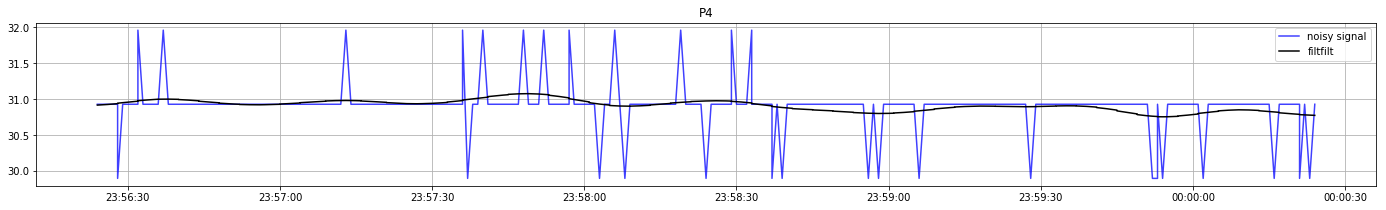

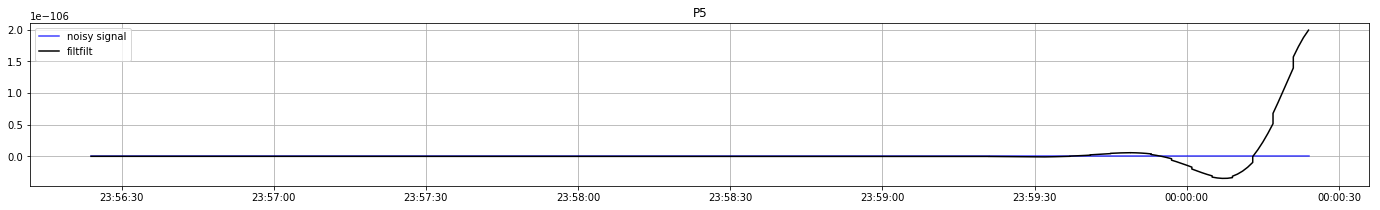

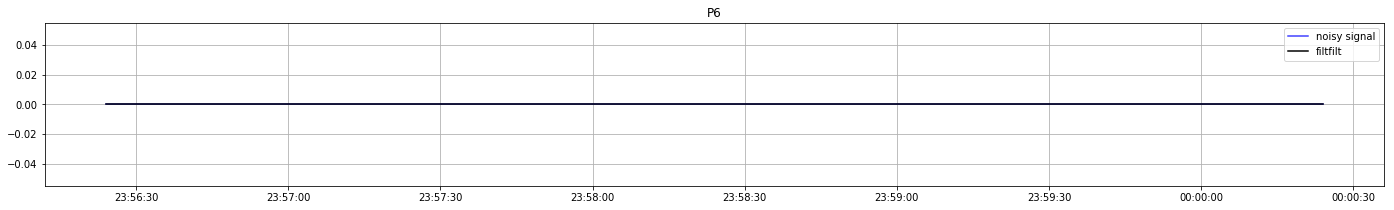

In [13]:
t = datos['DateTime'][11500:11800]
for i in datos.iloc[:,1:len(datos.columns)-1]:
    plt.figure(figsize=(24,3))
    plt.plot(t, dt[i][11500:11800], 'b', alpha=0.75)
    plt.plot(t, dtN[i][11500:11800], 'k')
    plt.legend(('noisy signal','filtfilt'), loc='best')
    plt.title(i)
    plt.grid(True)
    plt.savefig(i+".svg")

### Cálculo de las  estadísticas móviles
#### Widgets

In [14]:
import gc
gc.collect()

15533

In [15]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=25,
    min=1,
    max=50,
    description='Ventana:',
    readout=True,
    readout_format='d'
)

button = widgets.Button(
    description='Calcular'
)

progress = widgets.IntProgress(
    value=0,
    min=0,
    max=12,
    step=1,
    description='Procesado:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

hb = widgets.HBox([slider,button,progress])

In [16]:
display(hb)

dataE = datos.copy()

def estadisticos(b):
    global slider, dataE, progress
    
    progress.value = 0
    
    before = b.description
    b.description='Espera'

    print(" "*100,end='\r')
    
    ventanaMedia = slider.value
    
    for i in range(1,len(datos.columns)-1):
        nombre_col = 'P'+str(i)
        nombre_col_mean = nombre_col+' mean'
        dataE[nombre_col_mean] = dataE[nombre_col].rolling(ventanaMedia).mean()
        progress.value += 1

    ventanaDesviacion = ventanaMedia

    for i in range(1,len(datos.columns)-1):
        nombre_col = 'P'+str(i)
        nombre_col_std = nombre_col+' std'
        dataE[nombre_col_std] = dataE[nombre_col].rolling(ventanaDesviacion).std()
        progress.value += 1
        
    print('Calculos realizados para ventana a',ventanaMedia,end="\r")
    b.description = before
        
    dataE = dataE.dropna()
    

button.on_click(estadisticos)


In [17]:
dataE.head()

,DateTime,P1,P2,P3,P4,P5,P6,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
224,2018-10-30 21:23:21,0.0,20.911881,26.724809,22.222704,0.0,0.0,False,0.0,20.798660,26.791238,22.311552,0.0,0.0,0.0,0.096874,0.040690,0.157218,0.0,0.0
225,2018-10-30 21:23:21,0.0,20.912551,26.725592,22.235177,0.0,0.0,False,0.0,20.810714,26.788366,22.293462,0.0,0.0,0.0,0.091157,0.042721,0.136865,0.0,0.0
226,2018-10-30 21:23:22,0.0,20.911839,26.728061,22.248391,0.0,0.0,False,0.0,20.822001,26.785200,22.278134,0.0,0.0,0.0,0.085071,0.044174,0.117509,0.0,0.0
227,2018-10-30 21:23:23,0.0,20.909708,26.732143,22.262036,0.0,0.0,False,0.0,20.832443,26.781842,22.265492,0.0,0.0,0.0,0.078691,0.044913,0.099518,0.0,0.0
228,2018-10-30 21:23:24,0.0,20.906151,26.737710,22.275810,0.0,0.0,False,0.0,20.841968,26.778401,22.255430,0.0,0.0,0.0,0.072096,0.044864,0.083340,0.0,0.0


### Exportación

In [18]:
with open('data/datos.pdd','wb') as f:
    pk.dump(datos,f)
    
with open('data/datosE.pdd','wb') as f:
    pk.dump(dataE,f)